<a href="https://colab.research.google.com/github/Neha-Niharika-Kar/SmartKnower-DS-May-MinorProject/blob/main/Image_Classification_using_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE - MINOR PROJECT - by Neha Niharika Kar**

In [ ]:
# importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Gathering Data**

---



In [ ]:
pip install bing-image-downloader

In [ ]:
mkdir images

In [ ]:
from bing_image_downloader import downloader

In [ ]:
# downloading images of roses
downloader.download('Rose', output_dir='images', adult_filter_off=True)

[%] Downloading Images to /content/images/Rose


[!!]Indexing page: 1

[%] Indexed 100 Images on Page 1.


[%] Downloading Image #1 from https://res.cloudinary.com/bloomnation/c_pad,d_vendor:global:catalog:product:image.png,f_auto,fl_preserve_transparency,q_auto/v1582065462/vendor/2961/catalog/product/2/0/20150124123713_file_54c391f9051a6.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gardenfactoryny.com/media/catalog/product/cache/b456f9c06a31f834e13ba33f49c2d862/1/5/152085_iXgmC7xdydnBRH3e.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/d6/de/f1/d6def1939703699dcc99f426ee0a3eca.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://plants.tlcgarden.com/Content/Images/Photos/H099-17.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.jacksonandperkins.com/images/xxl/27740.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://altmanplants.com/wp-content/uploads/True-Gratitude-1.jpg
[%] F

In [ ]:
# downloading images of icecreams
downloader.download('Icecream', output_dir='images', adult_filter_off=True)

[%] Downloading Images to /content/images/Icecream


[!!]Indexing page: 1

[%] Indexed 100 Images on Page 1.


[%] Downloading Image #1 from http://americacomesalive.com/i/ice-cream-cone.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/03/9b/17/039b1756813fbfa361271c3b9cb75097.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://jessicainthekitchen.com/wp-content/uploads/2018/08/Vegan-Mango-Ice-Cream-3-Ingredients-5.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/a3/c4/a0/a3c4a04e8442675f2316d939b8e97700.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://cdn.shopify.com/s/files/1/1834/0943/products/coconut_icecream_800x.jpg?v=1530359804
[%] File Downloaded !

[%] Downloading Image #6 from http://truebarbecue.com/uploads/2014/11/Desserts-Ice-Cream-Sundae-.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/originals/5c/60/b3/5c60b35dbddc9353a81ab41ebbea9978.j

In [ ]:
# downloading images of bags
downloader.download('Bag', output_dir='images', adult_filter_off=True)

[%] Downloading Images to /content/images/Bag


[!!]Indexing page: 1

[%] Indexed 100 Images on Page 1.


[%] Downloading Image #1 from https://cdna.lystit.com/photos/da75-2015/08/24/lesportsac-true-navy-denim-modern-medium-weekender-bag-true-navy-denim-blue-product-0-615967496-normal.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.volclay.com.au/media/catalog/product/cache/1/small_image/9df78eab33525d08d6e5fb8d27136e95/W/U/WU35IM-14594_OU50TM.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://hackuc.com/wp-content/uploads/2019/05/A1oVpGVcm2L._UL1500_.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.parasolstore.co.uk/wp-content/uploads/2019/04/Haglofs-Teide-60L-Bag-True-Black-SC-339308-10725-4.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.ccs.com/media/catalog/product/cache/4/image/9df78eab33525d08d6e5fb8d27136e95/1/9/190450399912-4.1551980403.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://

# **Preprocessing the Data**

---



In [ ]:
data_path = '/content/images'       # path of the dataset
categories = ['Bag', 'Icecream', 'Rose']

In [ ]:
target = []
images = []
flat_data = []

for category in categories:
  print(category)

Bag
Icecream
Rose


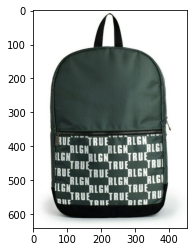

In [ ]:
# reading through the images
for category in categories:
  num = categories.index(category)       # label encoding of the data starting from 0
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    plt.imshow(img_array)
    break
  break

In [ ]:
# resizing the images
for category in categories:
  num = categories.index(category)   
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    img_resized = resize(img_array, (150,150,3))        # normalizes the values from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(num)

flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

In [ ]:
flat_data.shape

(300, 67500)

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([100, 100, 100]))

# **Training the Model**

---



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3)

In [ ]:
# hyperparameter tuning
param_grid = [
              { 'C': [1, 10, 100, 1000], 'kernel': ['linear'] },
              { 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf'] },
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_score_

0.8

# **Testing the Model**

---



In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2,
       2, 0])

In [ ]:
accuracy_score(y_pred, y_test)

0.7888888888888889

In [ ]:
confusion_matrix(y_test, y_pred)

array([[33,  1,  0],
       [ 4, 19,  3],
       [ 5,  6, 19]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        34
           1       0.73      0.73      0.73        26
           2       0.86      0.63      0.73        30

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.78        90
weighted avg       0.80      0.79      0.78        90



# **Predictions**

---



In [ ]:
# saving the model
pickle.dump(clf, open('image_model.p','wb'))

In [ ]:
model = pickle.load(open('image_model.p','rb'))

'Rose'

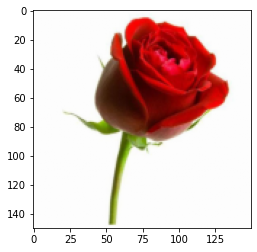

In [ ]:
flatten_data = []
url = 'https://4.imimg.com/data4/EC/GV/MY-14256363/rose-flower-500x500.jpg'
img = imread(url)
img_resized = resize(img, (150,150,3))
flatten_data.append(img_resized.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(img_resized)
y_out = model.predict(flatten_data)
y_out = categories[y_out[0]]
y_out

'Bag'

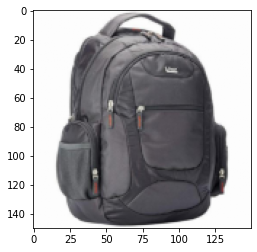

In [ ]:
flatten_data = []
url = 'https://5.imimg.com/data5/OT/EI/MY-12446631/vip-school-bag-500x500.jpg'
img = imread(url)
img_resized = resize(img, (150,150,3))
flatten_data.append(img_resized.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(img_resized)
y_out = model.predict(flatten_data)
y_out = categories[y_out[0]]
y_out

'Icecream'

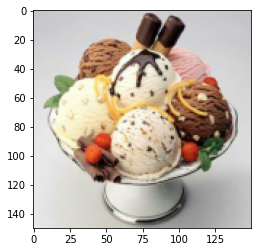

In [ ]:
flatten_data = []
url = 'https://res.cloudinary.com/swiggy/image/upload/f_auto,q_auto,fl_lossy/ae3qqfev6j7hzhxw6if3'
img = imread(url)
img_resized = resize(img, (150,150,3))
flatten_data.append(img_resized.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(img_resized)
y_out = model.predict(flatten_data)
y_out = categories[y_out[0]]
y_out

'Icecream'

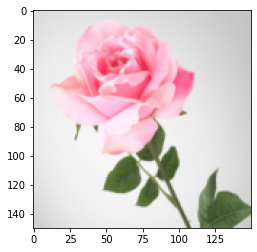

In [ ]:
flatten_data = []
url = 'https://www.ikea.com/in/en/images/products/smycka-artificial-flower-rose-pink__0902935_pe596772_s5.jpg'
img = imread(url)
img_resized = resize(img, (150,150,3))
flatten_data.append(img_resized.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(img_resized)
y_out = model.predict(flatten_data)
y_out = categories[y_out[0]]
y_out